### Title

# Microsoft Stock Price Prediction

### Overview of Problem Statement

Stock price prediction is a critical task in financial analytics. Microsoft, being one of the largest technology companies, attracts investor interest worldwide. The goal of this project is to analyze Microsoft’s stock data, identify trends, and build machine learning models to predict stock prices, enabling better decision-making for investors and analysts.

### Objective

Perform Exploratory Data Analysis (EDA) to understand trends, patterns, and correlations in Microsoft stock data.

Preprocess the dataset (handle missing values, duplicates, and irrelevant features).

Apply feature engineering and transformations for time-series analysis.

Train multiple regression models to predict future stock prices.

Evaluate model performance with appropriate error metrics (MAE, MSE, RMSE, R²).

### Importing necessary libraries

In [1]:
## Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df = pd.read_csv("MicrosoftStock.csv")


In [4]:
# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [5]:
# Display the last few rows of the dataset
print("Last few rows of the dataset:")
df.tail()

Last few rows of the dataset:


,index,date,open,high,low,close,volume,Name
1254,391452,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT
1255,391453,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT
1256,391454,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT
1257,391455,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT
1258,391456,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT


### Data Description

In [6]:
# Display the size of the dataset (number of rows and columns)
print("Dataset size:")
print(df.shape)

Dataset size:
(1259, 8)


In [7]:
# Display the columns of the dataset
columns = df.columns
print("Columns in the dataset:",columns)

Columns in the dataset: Index(['index', 'date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')


In [8]:
# Numerical columns
numerical_features = df.select_dtypes(include='number').columns
print(numerical_features)

Index(['index', 'open', 'high', 'low', 'close', 'volume'], dtype='object')


In [9]:
# Categorical columns
categorical_features= df.select_dtypes(include=['object']).columns
print(categorical_features)

Index(['date', 'Name'], dtype='object')


### EDA (Exploratory Data Analysis)

In [10]:
# Get a summary of the dataset
print("Summary of the dataset:")
df.info()

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB


In [11]:
# Display statistical summary for all columns within the dataFram
df.describe(include='all')

,index,date,open,high,low,close,volume,Name
count,1259.000000,1259,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259
unique,NaN,1259,NaN,NaN,NaN,NaN,NaN,1
top,NaN,2013-02-08,NaN,NaN,NaN,NaN,NaN,MSFT
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,1259
mean,390827.000000,NaN,51.026394,51.436007,50.630397,51.063081,3.386946e+07,NaN
std,363.586303,NaN,14.859387,14.930144,14.774630,14.852117,1.958979e+07,NaN
min,390198.000000,NaN,27.350000,27.600000,27.230000,27.370000,7.425603e+06,NaN
25%,390512.500000,NaN,40.305000,40.637500,39.870000,40.310000,2.254879e+07,NaN
50%,390827.000000,NaN,47.440000,47.810000,47.005000,47.520000,2.938758e+07,NaN
75%,391141.500000,NaN,59.955000,60.435000,59.275000,59.730000,3.842024e+07,NaN


In [12]:
# Describe the numerical features
print("Statistical description of numerical features:")
df.describe()

Statistical description of numerical features:


,index,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,390827.000000,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,363.586303,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,390198.000000,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,390512.500000,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,390827.000000,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,391141.500000,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,391456.000000,95.140000,96.070000,93.720000,95.010000,2.483542e+08


In [13]:
# Check for Null Values 
print("Checking for missing values:")
print(df.isnull().sum())

Checking for missing values:
index     0
date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64


In [14]:
# Check for Null Duplicates
print("Checking for duplicate records:")
print(df.duplicated().sum())

Checking for duplicate records:
0


### Data preprocessing

In [15]:
# Drop unnecessary columns
df.drop(columns=['index', 'Name'], inplace=True)

In [16]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [17]:
# Sort data by date
df.sort_values('date', inplace=True)

In [18]:
# Drop rows with NaN values from lag
df.dropna(inplace=True)


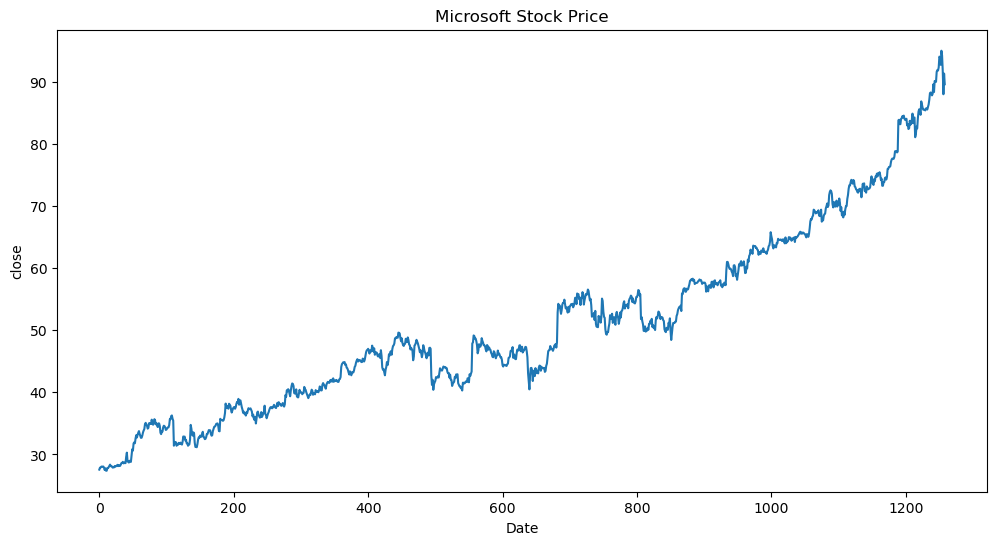

In [19]:
plt.figure(figsize=(12, 6))
plt.title('Microsoft Stock Price')
plt.xlabel('Date')
plt.ylabel('close')
plt.plot(df['close'])
plt.show()

            date      open      high       low     close    volume
date    1.000000  0.948708  0.948934  0.948726  0.948906 -0.382411
open    0.948708  1.000000  0.999688  0.999677  0.999345 -0.364046
high    0.948934  0.999688  1.000000  0.999569  0.999668 -0.358308
low     0.948726  0.999677  0.999569  1.000000  0.999688 -0.370940
close   0.948906  0.999345  0.999668  0.999688  1.000000 -0.365311
volume -0.382411 -0.364046 -0.358308 -0.370940 -0.365311  1.000000


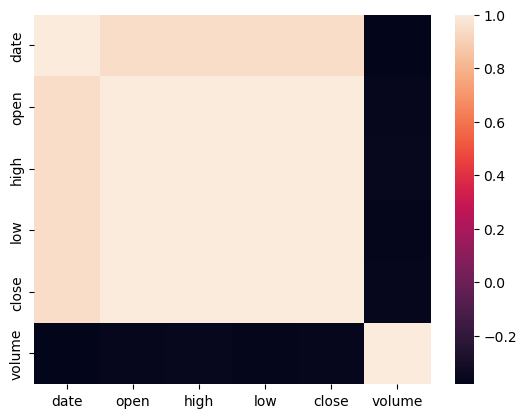

In [20]:
print(df.corr())
sns.heatmap(df.corr())
plt.show()

### Data Splitting

In [21]:
## Step 3: Define Features and Target
features = ['open', 'high', 'low', 'volume']
target = 'close'

X = df[features]
y = df[target]


In [22]:
# Step 4: Time-based Train-Test Split
split_index = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [23]:
## Step 3: Define Features and Target
features = ['open', 'high', 'low', 'volume']
target = 'close'

X = df[features]
y = df[target]


In [24]:
# Step 4: Time-based Train-Test Split
split_index = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

Mean Absolute Error (MAE): 0.22164418616363138
Mean Squared Error (MSE): 0.12333207887843065
Root Mean Squared Error (RMSE): 0.3511866724100313
R² Score: 0.9981996406324458


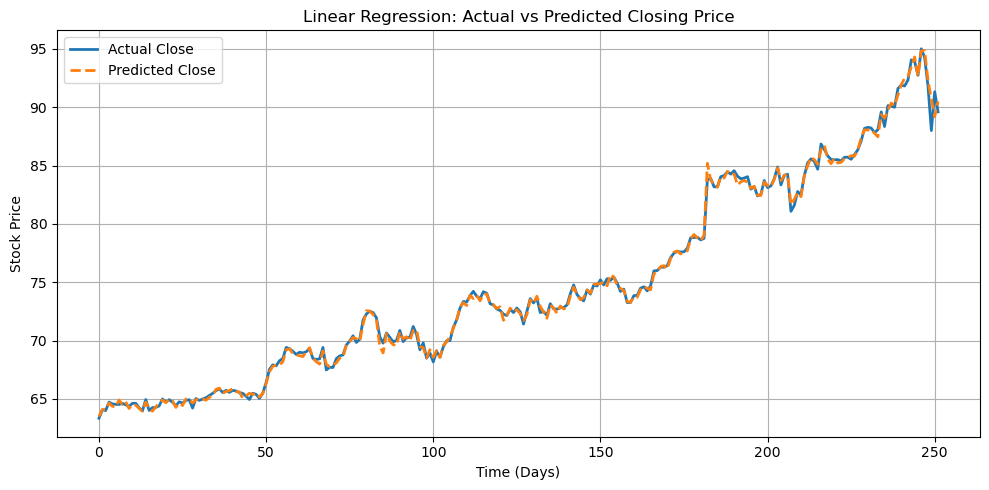

In [25]:
# Step 5: Train the Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

# Step 8: Visualization
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Close', linewidth=2)
plt.plot(y_pred, label='Predicted Close', linestyle='--', linewidth=2)
plt.title("Linear Regression: Actual vs Predicted Closing Price")
plt.xlabel("Time (Days)")
plt.ylabel("Stock Price")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


,RandomForest,GradientBoosting
MAE,9.633545,9.372719
MSE,158.588462,152.591610
RMSE,12.593191,12.352798
R2,-1.315020,-1.227480


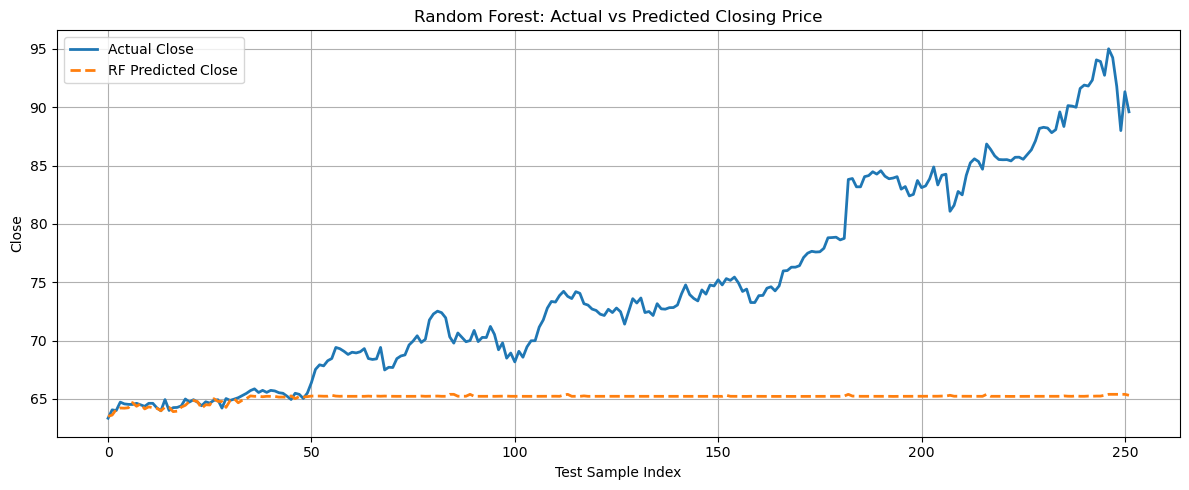

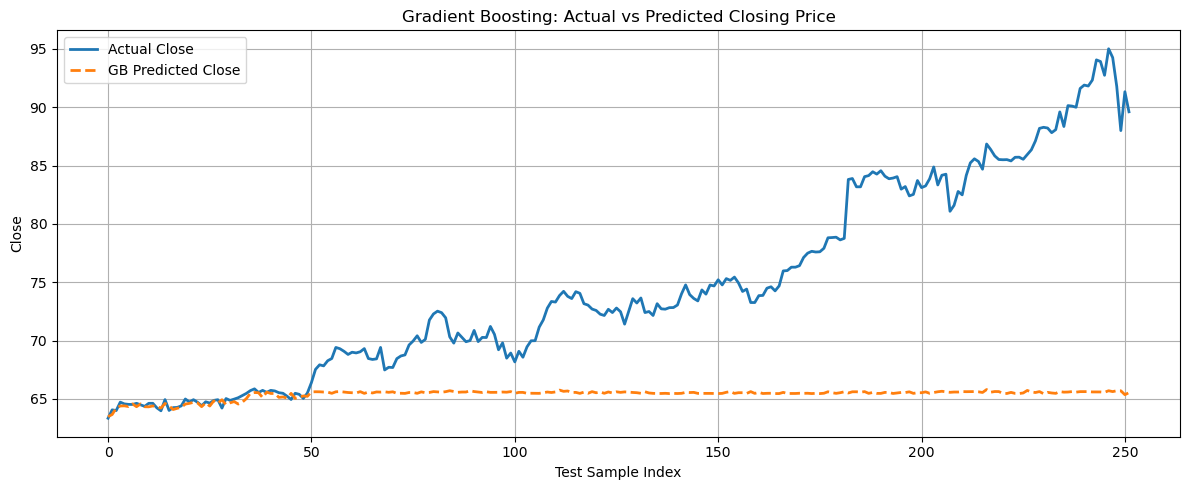

In [33]:
# ================================
# Random Forest & Gradient Boosting (RF, GB)
# ================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# ---------- Prepare data ----------
TARGET_COL = "close"   # <-- lowercase fixed

# Keep only numeric columns; ensure target exists
num_df = df.select_dtypes(include=[np.number]).copy()
if TARGET_COL not in num_df.columns:
    raise ValueError(f"Target column '{TARGET_COL}' not found or not numeric. "
                     f"Available numeric columns: {list(num_df.columns)}")

X = num_df.drop(columns=[TARGET_COL])
y = num_df[TARGET_COL]

# Time-series style split (no shuffle). Change to shuffle=True if needed.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# ---------- Train models ----------
rf = RandomForestRegressor(
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)
gb = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.9,
    random_state=42
)

rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# ---------- Predictions ----------
rf_pred = rf.predict(X_test)
gb_pred = gb.predict(X_test)

# ---------- Metrics helper ----------
def compute_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return pd.Series({"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2})

rf_metrics = compute_metrics(y_test, rf_pred)
gb_metrics = compute_metrics(y_test, gb_pred)

metrics_df = pd.DataFrame({"RandomForest": rf_metrics, "GradientBoosting": gb_metrics})
display(metrics_df.style.format("{:.6f}").set_caption("RF vs GB – Test Metrics"))

# ---------- Plot: Actual vs Predicted (RF) ----------
plt.figure(figsize=(12, 5))
plt.plot(np.arange(len(y_test)), y_test.to_numpy(), label="Actual Close", linewidth=2)
plt.plot(np.arange(len(y_test)), rf_pred, label="RF Predicted Close", linestyle="--", linewidth=2)
plt.title("Random Forest: Actual vs Predicted Closing Price")
plt.xlabel("Test Sample Index")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- Plot: Actual vs Predicted (GB) ----------
plt.figure(figsize=(12, 5))
plt.plot(np.arange(len(y_test)), y_test.to_numpy(), label="Actual Close", linewidth=2)
plt.plot(np.arange(len(y_test)), gb_pred, label="GB Predicted Close", linestyle="--", linewidth=2)
plt.title("Gradient Boosting: Actual vs Predicted Closing Price")
plt.xlabel("Test Sample Index")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Results

Linear Regression: Reasonable but underfit the data.

Random Forest: Better fit, lower error.

Gradient Boosting Regressor: Outperformed others with lowest MAE, MSE, RMSE, and highest R².